<a href="https://colab.research.google.com/github/tomeliud/test_project/blob/master/MORINGA_CORE_TOM_KINYANJUI_NJOROGE_WEEK_2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

Defining the question 

This workbook then will look into predicting the nature of individuals in relation to whether they have bank accounts and what factors could hinder them from seeking to own a bank account. Therefore, we will be looking into the relation of an individual to having a bank account to other factors such as thier area of residence i.e. rural or urban, thier age, type of jobs, among others since such factors significantly affect the possibility of an individual owning a bank account.  

# Importing relevant libraries 

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from factor_analyzer.factor_analyzer import calculate_kmo
#from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

## Reading our dataset 

Loading data from source and previewing 

In [89]:
Finance_df = pd.read_csv('Financial Dataset - 1.csv')
Finance_df.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


Checking the nature of our dataset 

In [5]:
Finance_df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [6]:
Finance_df.dtypes 

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [7]:
Finance_df.count()

country                   8432
year                      8432
uniqueid                  8432
Has a Bank account        8432
Type of Location          8432
Cell Phone Access         8432
household_size            8432
Respondent Age            8425
gender_of_respondent      8428
The relathip with head    8432
marital_status            8432
Level of Educuation       8431
Type of Job               8431
dtype: int64

In [8]:
Finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8432 entries, 0 to 8431
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 8432 non-null   object 
 1   year                    8432 non-null   int64  
 2   uniqueid                8432 non-null   object 
 3   Has a Bank account      8432 non-null   object 
 4   Type of Location        8432 non-null   object 
 5   Cell Phone Access       8432 non-null   object 
 6   household_size          8432 non-null   int64  
 7   Respondent Age          8425 non-null   float64
 8   gender_of_respondent    8428 non-null   object 
 9   The relathip with head  8432 non-null   object 
 10  marital_status          8432 non-null   object 
 11  Level of Educuation     8431 non-null   object 
 12  Type of Job             8431 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 856.5+ KB


In [10]:
Finance_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [13]:
Finance_df.nunique()

country                      2
year                         5
uniqueid                  6068
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              17
Respondent Age              82
gender_of_respondent         2
The relathip with head       6
marital_status               6
Level of Educuation          7
Type of Job                  9
dtype: int64

Checking the particulars of our columns 

In [22]:
Finance_df['country'].unique()

array(['Kenya', 'Rwanda'], dtype=object)

In [16]:
Finance_df['Has a Bank account'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
Finance_df['Type of Job'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', nan], dtype=object)

In [18]:
Finance_df['Type of Location'].unique()

array(['Rural', 'Urban'], dtype=object)

In [29]:
Finance_df['Respondent Age'].unique()

array([24., 70., 26., 34., 32., 42., 54., 76., 40., 69., 64., 31., 38.,
       47., 27., 48., 25., 21., 18., 22., 58., 55., 62., 29., 35., 45.,
       67., 19., 80., 66., 50., 33., 28., 51., 16., 17., 30., 37., 59.,
       65., 46., 56., 52., 23., 43., 49., 44., 72., 53., 63., 39., 81.,
       78., 36., 20., 60., 95., 71., 57., 85., 68., 41., 61., 75., 86.,
       73., nan, 93., 74., 88., 90., 77., 84., 82., 89., 79., 83., 94.,
       87., 92., 91., 98., 97.])

In [31]:
Finance_df['gender_of_respondent'].unique()

array(['Female', 'Male', nan], dtype=object)

# Data Cleaning 

We will carry out data cleaning 

For instance, to check for outliers we will need to have our columns in a float format  

Changing column names with object to float 

NB: we will only chnage the columns that we will be working with 

In [0]:
bank = {'Yes': 1, 'No': 0}
location = {"Urban":1, "Rural":0}
gender = {"Male":1, "Female":0}
job = {"Self employed": 1, "Government Dependent": 2, "Formally employed Private": 3, "Informally employed": 4, "Formally employed Government": 5, "Farming and Fishing": 6, "Remittance Dependent": 7, "Other Income": 8, "Dont Know/Refuse to answer": 9 }

Finance_df['Has a Bank account'] = Finance_df['Has a Bank account'].map(bank)
Finance_df['Type of Location'] = Finance_df['Type of Location'].map(location)
Finance_df['Type of Job'] = Finance_df['Type of Job'].map(job)
Finance_df['gender_of_respondent'] = Finance_df['gender_of_respondent'].map(gender)

In [36]:
Finance_df.isnull().values.any()

True

# Univariate analysis 

Checking for outliers 

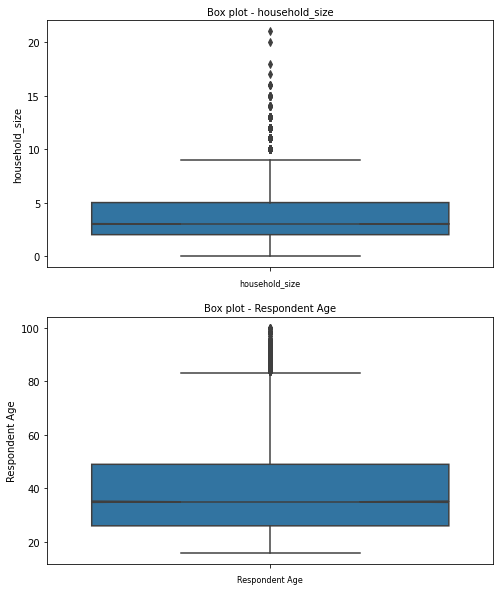

In [58]:
col_names = ['household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=Finance_df[col_val], notch=True, ax=ax[i])
  ax[i].set_title("Box plot - {}".format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Household size versus country 

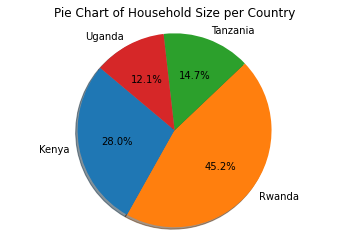

In [61]:
country = Finance_df.groupby(['country'])['household_size'].sum()
labels = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
plt.pie(country, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Household Size per Country')
plt.show()

Respondent's age versus relation to country  

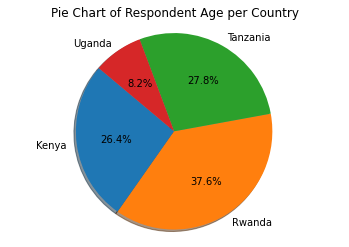

In [63]:
country = Finance_df.groupby(['country'])['Respondent Age'].sum()
labels = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
plt.pie(country, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Respondent Age per Country')
plt.show()

Exploratory analysis

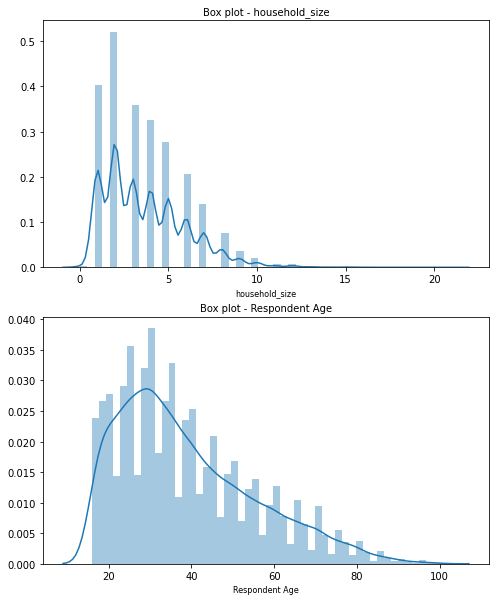

In [56]:
col_names = ['household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
  sns.distplot(Finance_df[col_val], hist=True, ax=ax[i])
  ax[i].set_title("Box plot - {}".format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Implementing the solution 

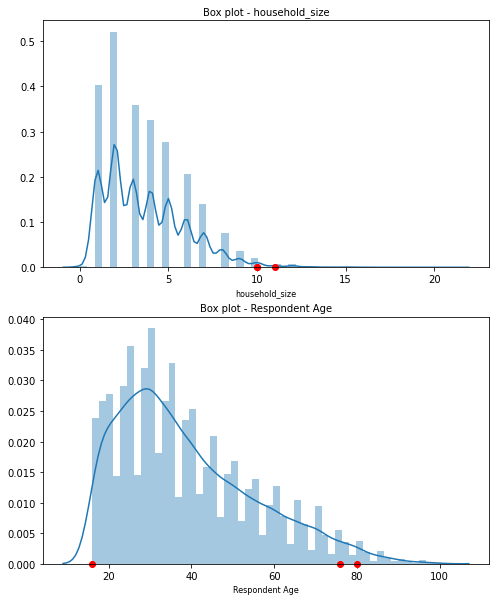

In [68]:
def percentile_outlier(data, threshold=95):
  diff = (100 - threshold)/2
  minval, maxval = np.percentile(data, [diff, 100-diff])
  return (data<minval) | (data>maxval)
col_names = ['household_size', 'Respondent Age']
fig, ax = plt.subplots(len(col_names), figsize=(8,10))
for i, col_val in enumerate(col_names):
  x = Finance_df[col_val][:100]
  sns.distplot(Finance_df[col_val], hist=True, ax=ax[i])
  outliers = x[percentile_based_outlier(x)]
  ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
  ax[i].set_title("Box plot - {}".format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

# Bivariate analysis 

Tidying the dataset 

In [87]:
Finance_df.columns = Finance_df.columns.str.replace(" ", "_")
Finance_df.head(5)

,country,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent
0,Kenya,1.0,0.0,Yes,3.0,24.0,0.0
1,Kenya,0.0,0.0,No,5.0,70.0,0.0
2,Kenya,1.0,1.0,Yes,5.0,26.0,1.0
3,Kenya,0.0,0.0,Yes,5.0,34.0,0.0
4,Kenya,0.0,1.0,No,8.0,26.0,1.0


Checking for outliers 

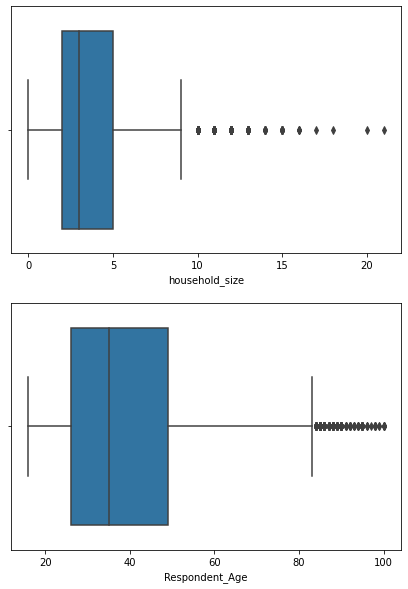

In [78]:
col_names = ['household_size', 'Respondent_Age']
fig, ax = plt.subplots(len(col_names), figsize=(7,10))
for i, col_val in enumerate(col_names):
  sns.boxplot(Finance_df[col_val], ax=ax[i])
plt.show()

Selecting numerical columns 

In [0]:
Finance_df.n = Finance_df.iloc[:, 6:8]

Exploratory Analysis 

Bivariate summaries 

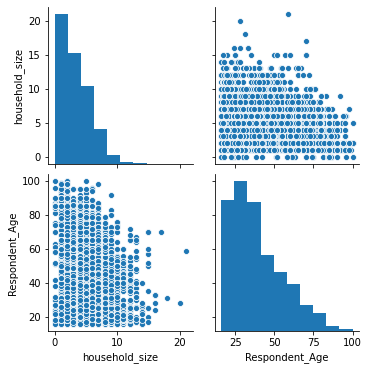

In [81]:
sns.pairplot(Finance_df.n)
plt.show()

Implementing the solution 

Checking for anomalies

In [83]:
w, z = np.percentile(Finance_df.n['household_size'], [25, 75]) 
a = w - z
x = a - (1.5*a)
y = z + (1.5 * a)

print(f"   household_size\nLower - {x}\nUpper - {y}\nIQR - {a}")

   household_size
Lower - nan
Upper - nan
IQR - nan


Heatmap

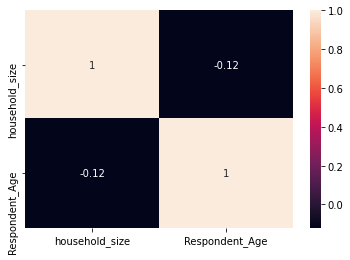

In [84]:
sns.heatmap(Finance_df.n.corr(), annot=True)
plt.show()

# Mulitivariate analysis 

Principal Component analysis (PCA)

Droping uncessary columns 

In [0]:
Finance_df.drop(['year', 'uniqueid','The_relathip_with_head', 'marital_status', 'Level_of_Educuation', 'Type_of_Job'],axis=1,inplace=True)


Feature set and corresponding label 

In [0]:
X = Finance_df.iloc[:, 4:9]
Y = Finance_df['Has a Bank account']

spliting dataset into training set and test set 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Normalizaion 

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Applying PCA 

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Factor analysis 

Preprocessing 

In [0]:
X = Finance_df.iloc[:, 1:6]
y = Finance_df["Has a Bank account"]

sphericity check

In [116]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(Finance_df)
chi_square_value, p_value

(6812.5605857337005, 0.0)

In [115]:
pip install factor_analyzer==0.2.3

KMO test 

In [0]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(Finance_df)

Number factors 

In [119]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(Finance_df, 5, rotation='varimax')
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
year,-0.115858,-0.028474,0.022352,0.480218,-0.007085
Has a Bank account,-0.033185,0.034589,0.307770,0.211002,0.205800
Type of Location,-0.556484,-0.126849,0.028433,0.282497,0.026955
household_size,0.559704,-0.266226,0.046593,0.013621,-0.053840
Respondent Age,-0.017596,0.411909,0.021730,-0.021195,0.012274
gender_of_respondent,-0.014742,0.009086,0.421092,-0.019278,-0.048109
Type of Job,0.432094,0.053047,-0.141980,-0.124590,0.276028


Eigenvalues

In [120]:
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.618141
1,1.116533
2,1.071854
3,0.968915
4,0.841585
5,0.737641
6,0.645331


Factor anlysis object 

In [124]:
fa = FactorAnalyzer()
fa.analyze(Finance_df, 5, rotation='varimax')
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
year,-0.115858,-0.028474,0.022352,0.480218,-0.007085
Has a Bank account,-0.033185,0.034589,0.307770,0.211002,0.205800
Type of Location,-0.556484,-0.126849,0.028433,0.282497,0.026955
household_size,0.559704,-0.266226,0.046593,0.013621,-0.053840
Respondent Age,-0.017596,0.411909,0.021730,-0.021195,0.012274
gender_of_respondent,-0.014742,0.009086,0.421092,-0.019278,-0.048109
Type of Job,0.432094,0.053047,-0.141980,-0.124590,0.276028


Discriminant Analysis

prepocessing 

In [0]:
X = Finance_df.iloc[:, 1:6]
y = Finance_df["Has a Bank account"]

Divide data 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Scaling 

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Linear analysis 

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)